In [1]:
require(tidyverse)
library(dplyr)
library(ggplot2)
#library(psych) 
library(GGally)
options(warn=-1)
options(scipen=999)
#library(crosstable)

Loading required package: tidyverse

── Attaching packages ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.2.1     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

Warning message:
“package ‘tibble’ was built under R version 4.2.3”
── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘GGally’ was built under R version 4.2.3”
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [242]:
path <- "~/"

varimp_10_files_list  <- path %>% 
  
  # get csvs full paths. (?i) is for case insentitive
  list.files(pattern = "varimp_10_.*Aware.*\\.csv$", full.names = TRUE)

varimp_10_files_agnostic_list  <- path %>% 
  
  # get csvs full paths. (?i) is for case insentitive
  list.files(pattern = "varimp_10000_.*Agnostic.*\\.csv$", full.names = TRUE)

In [243]:
varimp_10_df<-Reduce(bind_rows,lapply(varimp_10_files_list,read.csv))

varimp_10_df %>% dim()

varimp_10_agnostic_df <-Reduce(bind_rows,lapply(varimp_10_files_agnostic_list,read.csv))

[1] 6530  891

In [244]:
varimp_10_df[is.na(varimp_10_df)] <- 0
statistics_varimp_df<-varimp_10_df %>% select(-features) %>% group_by(corpus,tag,ppmi,setting,impute,dataset,y,pattern,timespan,cutoff) %>% 
summarise_all(mean)

In [245]:
varimp_10_agnostic_df[is.na(varimp_10_agnostic_df)] <- 0
statistics_varimp_agnostic_df<-varimp_10_agnostic_df %>% select(-features) %>% group_by(corpus,tag,ppmi,setting,impute,dataset,y,pattern,timespan,cutoff) %>% 
summarise_all(mean)

In [246]:
varimp_10_df %>% head()

,corpus,tag,ppmi,setting,timespan,cutoff,impute,dataset,pattern,features,⋯,change_mod.1930,change_mod.1940,change_mod.1950,change_mod.1960,change_mod.1970,change_mod.1980,change_mod.1990,change_mod.2000,change_mod.2010,perc_type_comp.1820
,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,google,Tagged,PPMI,Aware,10,0,med,cordeiro100,all,all,⋯,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,14.77273,0.00000,0.00000,0
2,google,Tagged,PPMI,Aware,10,0,med,cordeiro100,all,all,⋯,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,93.00320,0.00000,0.00000,0
3,google,Tagged,PPMI,Aware,10,0,med,cordeiro100,all,all,⋯,79.830848,62.62395,46.04158,29.66102,58.72853,68.85367,100.00000,50.70656,29.09666,0
4,google,Tagged,PPMI,Aware,10,0,med,cordeiro100,all,all,⋯,5.112749,0.00000,0.00000,0.00000,0.00000,0.00000,100.00000,0.00000,0.00000,0
5,google,Tagged,PPMI,Aware,10,0,med,cordeiro100,all,all,⋯,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,95.74509,0.00000,0.00000,0
6,google,Tagged,PPMI,Aware,10,0,med,cordeiro100,all,all,⋯,71.890608,56.66156,35.32124,18.84848,50.66796,66.65282,100.00000,43.00520,24.55832,0


In [247]:
statistics_varimp_pivoted_df<-statistics_varimp_df %>% select(!c(n,seed,ml_algo)) %>%
  pivot_longer(!c('corpus','tag','ppmi','setting','timespan','cutoff','impute','dataset','pattern','y'), names_to = "feature_time", values_to = "value")

statistics_varimp_agnostic_pivoted_df<-statistics_varimp_agnostic_df %>% select(!c(n,seed,ml_algo)) %>%
  pivot_longer(!c('corpus','tag','ppmi','setting','timespan','cutoff','impute','dataset','pattern','y'), names_to = "feature_time", values_to = "value")


In [248]:
statistics_varimp_pivoted_df<-statistics_varimp_pivoted_df %>% separate(col=feature_time,into=c('feature', 'time'), sep='\\.',remove=FALSE)

statistics_varimp_agnostic_pivoted_df<-statistics_varimp_agnostic_pivoted_df %>% separate(col=feature_time,into=c('feature', 'time'), sep='\\.',remove=FALSE)


In [249]:
cordeiro_cols<-c('arith_mean_sim.','beta.','geom_mean_sim.','sim_cpf_0.','sim_cpf_100.','sim_cpf_25.','sim_cpf_50.','sim_cpf_75.','sim_cpf_beta.')
cosine_sim_cols<-c("sim_bw_constituents.",'sim_with_head.','sim_with_modifier.')

with_setting_cols<-c("sim_bw_settings_comp.","sim_bw_settings_head.","sim_bw_settings_modifier.",'perc_token_modifier.','perc_type_modifier.','perc_token_head.','perc_type_head.','perc_token_comp.','perc_type_comp.')
info_theory_cols<-c("local_mi.","log_ratio.","ppmi.")
freq_cols<-c("comp_freq.","comp_tf.","head_freq.","head_tf.","log_comp_freq.","log_head_freq.","log_head_freq_new.","log_mod_freq.","log_mod_freq_new.","mod_freq.","mod_tf.")
prod_cols<-c("head_family_size.","head_family_size_new.","head_prod.","mod_family_size.","mod_family_size_new.","mod_prod.")
change_cols<-c('change_comp.','change_mod.','change_head.')

In [250]:
statistics_varimp_pivoted_df$feature<-paste0(statistics_varimp_pivoted_df$feature,".")
statistics_varimp_pivoted_df$feature_class<-""
statistics_varimp_pivoted_df$feature_class[statistics_varimp_pivoted_df$feature %in%  cordeiro_cols] <- "cordeiro"
statistics_varimp_pivoted_df$feature_class[statistics_varimp_pivoted_df$feature %in%  cosine_sim_cols] <- "cosine_sim"
statistics_varimp_pivoted_df$feature_class[statistics_varimp_pivoted_df$feature %in%  with_setting_cols] <- "with_setting"
statistics_varimp_pivoted_df$feature_class[statistics_varimp_pivoted_df$feature %in%  info_theory_cols] <- "info_theory"
statistics_varimp_pivoted_df$feature_class[statistics_varimp_pivoted_df$feature %in%  freq_cols] <- "freq"
statistics_varimp_pivoted_df$feature_class[statistics_varimp_pivoted_df$feature %in%  prod_cols] <- "prod"
statistics_varimp_pivoted_df$feature_class[statistics_varimp_pivoted_df$feature %in%  change_cols] <- "temp_change"
head(statistics_varimp_pivoted_df)


statistics_varimp_agnostic_pivoted_df$feature<-paste0(statistics_varimp_agnostic_pivoted_df$feature,".")
statistics_varimp_agnostic_pivoted_df$feature_class<-""
statistics_varimp_agnostic_pivoted_df$feature_class[statistics_varimp_agnostic_pivoted_df$feature %in%  cordeiro_cols] <- "cordeiro"
statistics_varimp_agnostic_pivoted_df$feature_class[statistics_varimp_agnostic_pivoted_df$feature %in%  cosine_sim_cols] <- "cosine_sim"
statistics_varimp_agnostic_pivoted_df$feature_class[statistics_varimp_agnostic_pivoted_df$feature %in%  with_setting_cols] <- "with_setting"
statistics_varimp_agnostic_pivoted_df$feature_class[statistics_varimp_agnostic_pivoted_df$feature %in%  info_theory_cols] <- "info_theory"
statistics_varimp_agnostic_pivoted_df$feature_class[statistics_varimp_agnostic_pivoted_df$feature %in%  freq_cols] <- "freq"
statistics_varimp_agnostic_pivoted_df$feature_class[statistics_varimp_agnostic_pivoted_df$feature %in%  prod_cols] <- "prod"
statistics_varimp_agnostic_pivoted_df$feature_class[statistics_varimp_agnostic_pivoted_df$feature %in%  change_cols] <- "temp_change"
head(statistics_varimp_agnostic_pivoted_df)

corpus,tag,ppmi,setting,impute,dataset,y,pattern,timespan,cutoff,feature_time,feature,time,value,feature_class
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>
google,Tagged,PPMI,Aware,med,cordeiro100,compound,all,10,0,arith_mean_sim.1820,arith_mean_sim.,1820,3.852587,cordeiro
google,Tagged,PPMI,Aware,med,cordeiro100,compound,all,10,0,arith_mean_sim.1830,arith_mean_sim.,1830,3.924156,cordeiro
google,Tagged,PPMI,Aware,med,cordeiro100,compound,all,10,0,arith_mean_sim.1840,arith_mean_sim.,1840,4.152527,cordeiro
google,Tagged,PPMI,Aware,med,cordeiro100,compound,all,10,0,arith_mean_sim.1850,arith_mean_sim.,1850,1.556127,cordeiro
google,Tagged,PPMI,Aware,med,cordeiro100,compound,all,10,0,arith_mean_sim.1860,arith_mean_sim.,1860,3.820314,cordeiro
google,Tagged,PPMI,Aware,med,cordeiro100,compound,all,10,0,arith_mean_sim.1870,arith_mean_sim.,1870,1.478967,cordeiro


corpus,tag,ppmi,setting,impute,dataset,y,pattern,timespan,cutoff,feature_time,feature,time,value,feature_class
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>
google,Tagged,PPMI,Agnostic,med,cordeiro100,compound,all,10000,0,arith_mean_sim.0,arith_mean_sim.,0,0.0000000,cordeiro
google,Tagged,PPMI,Agnostic,med,cordeiro100,compound,all,10000,0,beta.0,beta.,0,2.0000866,cordeiro
google,Tagged,PPMI,Agnostic,med,cordeiro100,compound,all,10000,0,comp_freq.0,comp_freq.,0,4.0010389,freq
google,Tagged,PPMI,Agnostic,med,cordeiro100,compound,all,10000,0,comp_tf.0,comp_tf.,0,4.3238234,freq
google,Tagged,PPMI,Agnostic,med,cordeiro100,compound,all,10000,0,geom_mean_sim.0,geom_mean_sim.,0,20.2762614,cordeiro
google,Tagged,PPMI,Agnostic,med,cordeiro100,compound,all,10000,0,head_family_size.0,head_family_size.,0,0.5671029,prod


In [251]:
a_df<-statistics_varimp_pivoted_df %>% filter(dataset=="reddy") %>% group_by(feature_class,y) %>% summarize(mean(value), sd(value))
a_df

`summarise()` has grouped output by 'feature_class'. You can override using the `.groups` argument.


feature_class,y,mean(value),sd(value)
<chr>,<chr>,<dbl>,<dbl>
cordeiro,compound,4.830422,8.503546
cordeiro,head,8.781895,13.357776
cordeiro,modifier,4.802837,8.337442
cosine_sim,compound,6.882673,11.543825
cosine_sim,head,10.275590,14.872938
cosine_sim,modifier,5.342621,8.556180
freq,compound,5.025244,9.677095
freq,head,6.203547,9.923924
freq,modifier,5.550674,10.498190


In [252]:
b_df<-statistics_varimp_agnostic_pivoted_df %>% filter(dataset=="reddy") %>% group_by(feature_class,y) %>% summarize(mean(value), sd(value))
b_df

`summarise()` has grouped output by 'feature_class'. You can override using the `.groups` argument.


feature_class,y,mean(value),sd(value)
<chr>,<chr>,<dbl>,<dbl>
cordeiro,compound,12.696976,19.87928
cordeiro,head,23.028799,24.22933
cordeiro,modifier,16.308505,22.34786
cosine_sim,compound,27.335130,29.51536
cosine_sim,head,37.344333,28.10347
cosine_sim,modifier,22.178832,25.40301
freq,compound,17.243495,27.11514
freq,head,18.521557,20.02373
freq,modifier,22.916049,26.19106


In [253]:
statistics_varimp_pivoted_df %>% group_by(feature) %>% summarize(mv=mean(value))  %>% arrange(desc(mv))


feature,mv
<chr>,<dbl>
change_comp.,14.047249
change_mod.,13.965230
sim_with_head.,11.791528
geom_mean_sim.,10.970118
change_head.,10.661369
arith_mean_sim.,10.342648
perc_token_head.,9.355718
sim_bw_settings_comp.,8.984321
perc_type_comp.,8.674851


In [240]:
statistics_varimp_pivoted_df %>% group_by(feature_time) %>% summarize(mv=mean(value))  %>% arrange(desc(mv))


feature_time,mv
<chr>,<dbl>
sim_with_head.1990,25.00155
sim_with_head.1980,24.17151
sim_with_head.2000,23.55492
geom_mean_sim.2010,23.40766
geom_mean_sim.1990,22.81329
geom_mean_sim.2000,22.80009
arith_mean_sim.1990,21.31502
sim_with_head.2010,21.23885
geom_mean_sim.1980,20.54563


In [212]:
statistics_varimp_pivoted_df %>% group_by(time) %>% summarize(mv=mean(value))  %>% arrange(desc(mv))


time,mv
<chr>,<dbl>
2010,10.252309
2000,9.383194
1990,8.938697
1980,8.295696
1970,7.677133
1830,7.541966
1960,7.454655
1820,7.331479
1840,7.253404


In [232]:
# in one pipeline:
rsquared_files_list  <- path %>% 
  
  # get csvs full paths. (?i) is for case insentitive
  list.files(pattern = "rsquared_.*\\.csv$", full.names = TRUE)


In [233]:
rsquared_df<-Reduce(rbind,lapply(rsquared_files_list,read.csv))

In [234]:
rsquared_df %>% dim()

[1] 71150    18

In [235]:
rsquared_df<- rsquared_df %>% filter(!(pattern=="all" & tag=="Tagged"))
rsquared_df %>% dim()

[1] 57370    18

In [236]:
rsquared_df$cutoff<-as.factor(rsquared_df$cutoff)


In [237]:
statistics<-rsquared_df %>% group_by(corpus,tag,ppmi,setting,impute,dataset,y,pattern,timespan,cutoff) %>% 
summarise(n=mean(n),meanRsquared=mean(TrainRsquared),sdRsquared=sd(TrainRsquared),meanCorr=mean(TrainSpearman),sdCorr=sd(TrainSpearman),mean_feat=round(mean(npred),0))

statistics   %>% filter(y=="compound") %>% arrange(desc(meanCorr)) %>% head(10)

`summarise()` has grouped output by 'corpus', 'tag', 'ppmi', 'setting', 'impute', 'dataset', 'y', 'pattern', 'timespan'. You can override using the `.groups` argument.


corpus,tag,ppmi,setting,impute,dataset,y,pattern,timespan,cutoff,n,meanRsquared,sdRsquared,meanCorr,sdCorr,mean_feat
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
google,UnTagged,RAW,Agnostic,na,reddy,compound,all,10,100,90,0.6994867,0.02309277,0.7985843,0.02721404,26
google,Tagged,RAW,Aware,na,reddy,compound,nn,10,100,90,0.5876954,0.07395973,0.7574474,0.08067438,164
google,UnTagged,RAW,Agnostic,med,reddy,compound,all,20,500,90,0.6476684,0.02201945,0.7546467,0.03051108,20
google,UnTagged,RAW,Agnostic,na,reddy,compound,all,20,500,90,0.6348172,0.02792787,0.7502408,0.03882578,26
google,Tagged,PPMI,Aware,med,reddy,compound,an,50,0,90,0.6281572,0.02090080,0.7487922,0.02574987,33
google,Tagged,RAW,Aware,na,reddy,compound,nn,10,50,90,0.5663117,0.03694719,0.7482954,0.06589498,114
google,UnTagged,RAW,Aware,med,reddy,compound,all,100,500,90,0.6031964,0.01686978,0.7462862,0.03253911,21
google,UnTagged,RAW,Agnostic,med,reddy,compound,all,20,1000,90,0.6559819,0.01451446,0.7457163,0.02909761,34
google,Tagged,PPMI,Aware,na,reddy,compound,an,50,0,90,0.6114104,0.02257642,0.7429472,0.02251480,40


In [238]:
statistics  %>% filter(y =="head") %>% arrange(desc(meanCorr)) %>% head(10)



corpus,tag,ppmi,setting,impute,dataset,y,pattern,timespan,cutoff,n,meanRsquared,sdRsquared,meanCorr,sdCorr,mean_feat
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
google,Tagged,PPMI,Aware,med,reddy,head,an,10000,0,90,0.5732368,0.02289994,0.7758014,0.01190246,13
google,UnTagged,PPMI,Aware,med,reddy,head,all,100,0,90,0.6001502,0.02995168,0.7719670,0.03313741,45
google,UnTagged,PPMI,Aware,med,reddy,head,all,50,50,90,0.5937248,0.03700083,0.7672359,0.01913476,104
google,UnTagged,PPMI,Agnostic,med,reddy,head,all,10000,0,90,0.5903843,0.02515917,0.7624793,0.02158783,26
google,UnTagged,PPMI,Agnostic,na,reddy,head,all,10000,0,90,0.6128205,0.02426373,0.7601899,0.02311325,24
google,UnTagged,PPMI,Agnostic,na,reddy,head,all,100,50,90,0.5729635,0.03568949,0.7549458,0.02374211,50
google,UnTagged,PPMI,Aware,med,reddy,head,all,50,100,90,0.5655250,0.03211646,0.7545801,0.02455740,119
google,Tagged,PPMI,Aware,na,reddy,head,an,10000,0,90,0.5432218,0.02493974,0.7503143,0.02161263,29
google,UnTagged,PPMI,Agnostic,na,reddy,head,all,100,10,90,0.5596220,0.03724866,0.7492804,0.02538759,49


In [187]:
statistics  %>% filter(y =="modifier" ) %>% arrange(desc(meanCorr)) %>% head(10)

corpus,tag,ppmi,setting,impute,dataset,y,pattern,timespan,cutoff,n,meanRsquared,sdRsquared,meanCorr,sdCorr,mean_feat
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
google,Tagged,PPMI,Aware,med,reddy,modifier,an,50,100,90,0.4095427,0.02739888,0.7024101,0.09967617,50
google,Tagged,PPMI,Aware,med,reddy,modifier,nn,50,50,90,0.4072014,0.02400354,0.6846651,0.09634595,32
google,Tagged,PPMI,Aware,med,reddy,modifier,an,50,50,90,0.4129793,0.02588792,0.6824167,0.09494256,36
google,Tagged,PPMI,Aware,med,reddy,modifier,an,20,1000,90,0.4132974,0.03206963,0.6818004,0.09571514,7
google,Tagged,PPMI,Aware,med,reddy,modifier,nn,50,100,90,0.4053036,0.02531780,0.6813678,0.09638545,52
google,Tagged,PPMI,Aware,med,reddy,modifier,nn,20,1000,90,0.4059057,0.02953564,0.6791162,0.09779073,6
google,Tagged,PPMI,Aware,na,reddy,modifier,nn,20,1000,90,0.4125160,0.04005246,0.6715336,0.09970891,93
google,Tagged,PPMI,Aware,na,reddy,modifier,an,20,1000,90,0.4136445,0.03129876,0.6701365,0.09754639,51
google,UnTagged,PPMI,Aware,na,cordeiro100,modifier,all,10000,0,100,0.4667158,0.03044212,0.6653134,0.02953336,32


In [188]:
summary(aov(mean_feat~y, data = statistics))

              Df   Sum Sq Mean Sq F value               Pr(>F)    
y              2   951017  475508   34.93 0.000000000000000842 ***
Residuals   5648 76897075   13615                                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [189]:
summary(aov(meanCorr~tag, data = statistics))

              Df Sum Sq Mean Sq F value              Pr(>F)    
tag            1   3.12  3.1198   264.9 <0.0000000000000002 ***
Residuals   5649  66.53  0.0118                                
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [190]:
summary(aov(meanCorr~ppmi, data = statistics))

              Df Sum Sq Mean Sq F value Pr(>F)
ppmi           1   0.02 0.01694   1.374  0.241
Residuals   5649  69.63 0.01233               

In [191]:
summary(aov(meanCorr~setting, data = statistics))

              Df Sum Sq Mean Sq F value Pr(>F)
setting        1   0.03 0.02668   2.165  0.141
Residuals   5649  69.62 0.01232               

In [192]:
summary(aov(meanCorr~timespan, data = statistics))

              Df Sum Sq Mean Sq F value Pr(>F)  
timespan       1   0.04 0.03653   2.965 0.0852 .
Residuals   5649  69.61 0.01232                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [193]:
summary(aov(meanCorr~cutoff, data = statistics))

              Df Sum Sq Mean Sq F value     Pr(>F)    
cutoff         5   0.40 0.08028   6.544 0.00000445 ***
Residuals   5645  69.25 0.01227                       
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [194]:
summary(aov(meanCorr~timespan*cutoff, data = statistics))

                  Df Sum Sq Mean Sq F value     Pr(>F)    
timespan           1   0.04 0.03653   2.988   0.083931 .  
cutoff             5   0.39 0.07865   6.433 0.00000573 ***
timespan:cutoff    5   0.28 0.05501   4.499   0.000428 ***
Residuals       5639  68.94 0.01223                       
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

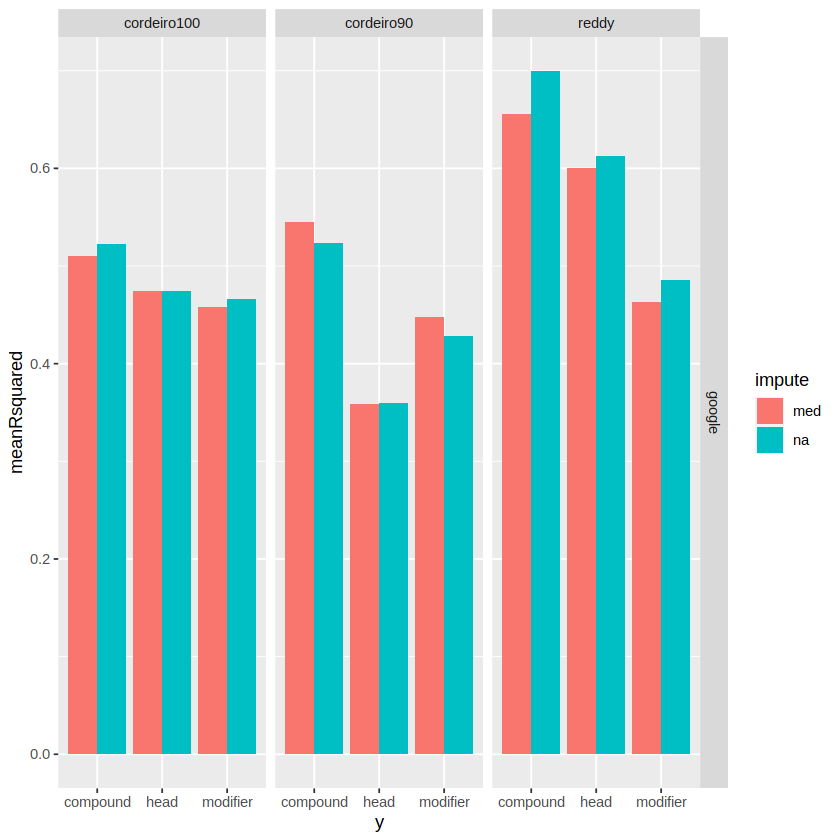

In [195]:
statistics %>% ggplot(aes(x=meanRsquared,y=y,fill=impute)) + facet_grid(corpus~dataset) +geom_bar(stat='identity',position = "dodge")  + 
coord_flip()

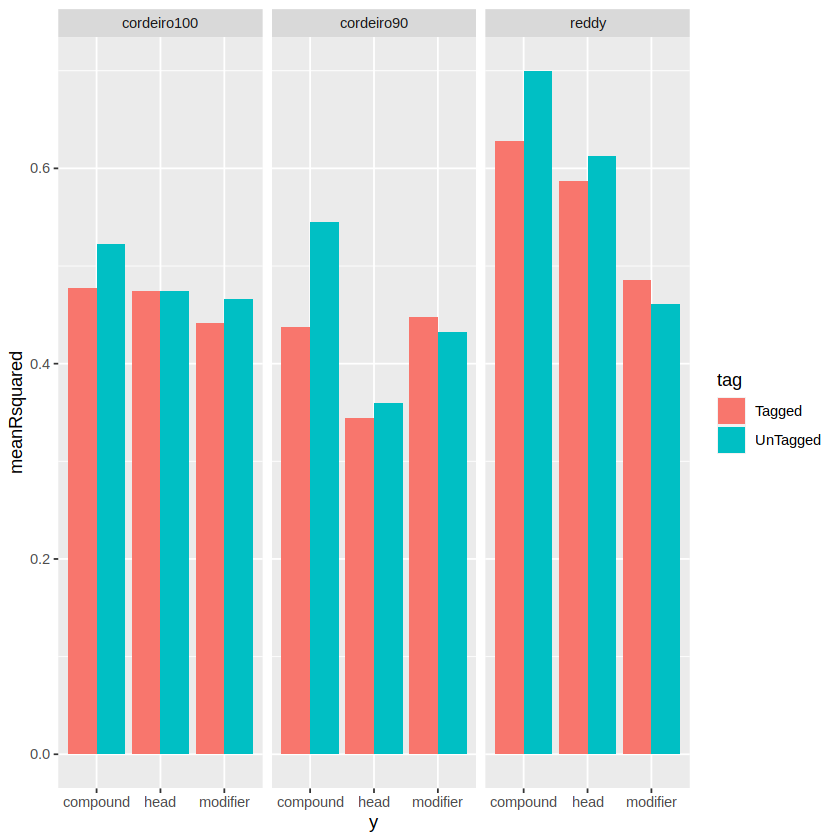

In [196]:
statistics %>%  ggplot(aes(x=meanRsquared,y=y,fill=tag)) + facet_grid(~dataset) +geom_bar(stat='identity',position = "dodge")  + 
coord_flip()

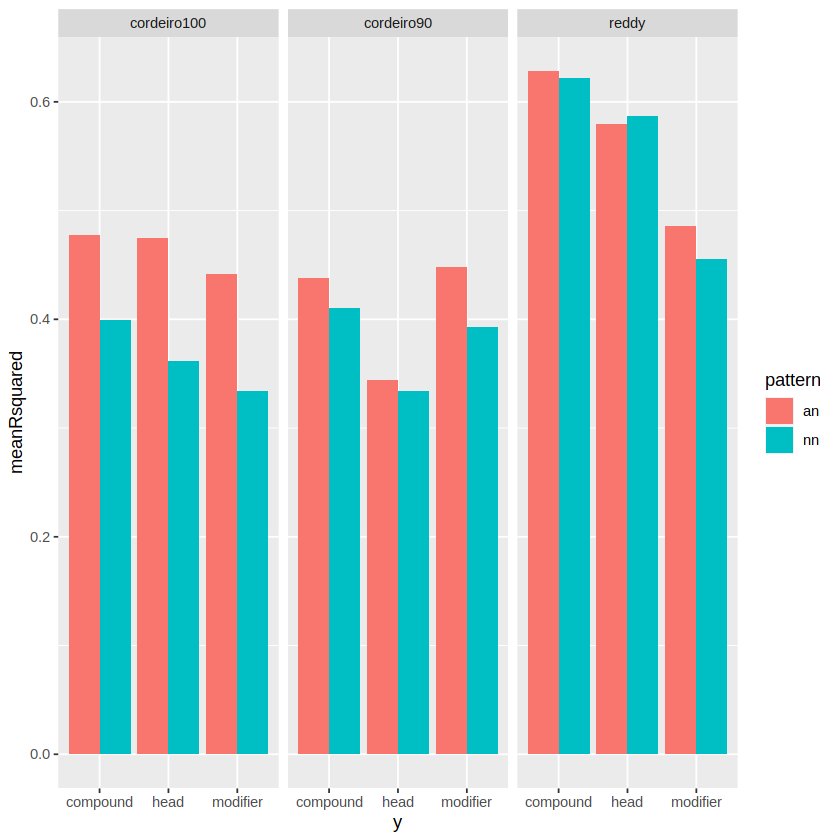

In [197]:
statistics %>% filter(tag=="Tagged") %>% ggplot(aes(x=meanRsquared,y=y,fill=pattern)) + facet_grid(~dataset) +geom_bar(stat='identity',position = "dodge")  + 
coord_flip()

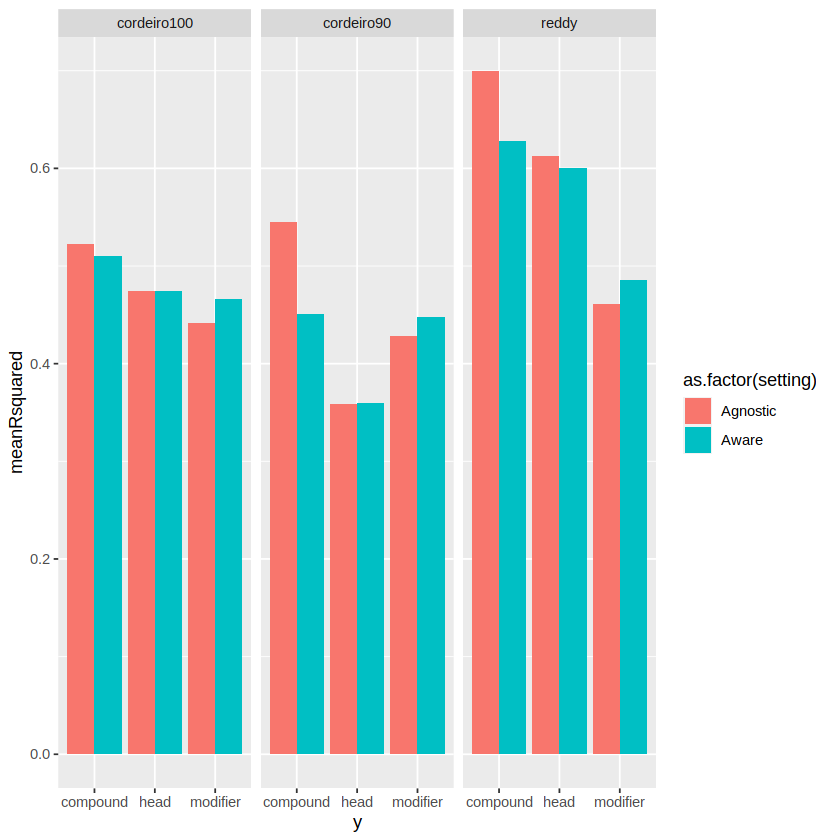

In [198]:
statistics %>% ggplot(aes(x=meanRsquared,y=y,fill=as.factor(setting))) + facet_grid(~dataset) +geom_bar(stat='identity',position = "dodge")  + 
coord_flip()

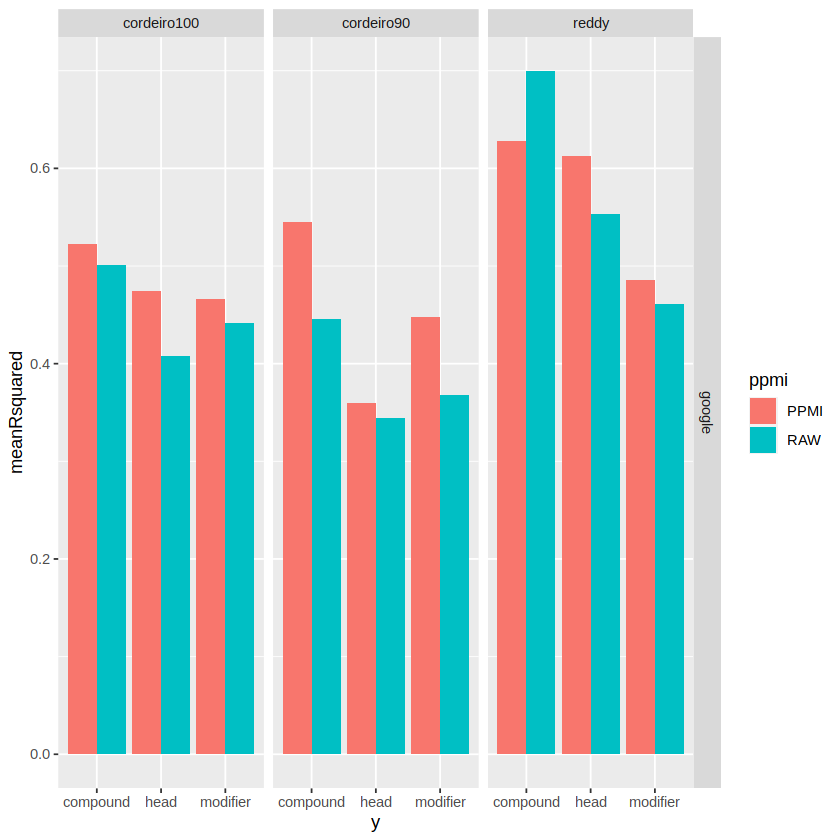

In [199]:
statistics %>% ggplot(aes(x=meanRsquared,y=y,fill=ppmi)) + facet_grid(corpus~dataset) +geom_bar(stat='identity',position = "dodge")  + 
coord_flip()

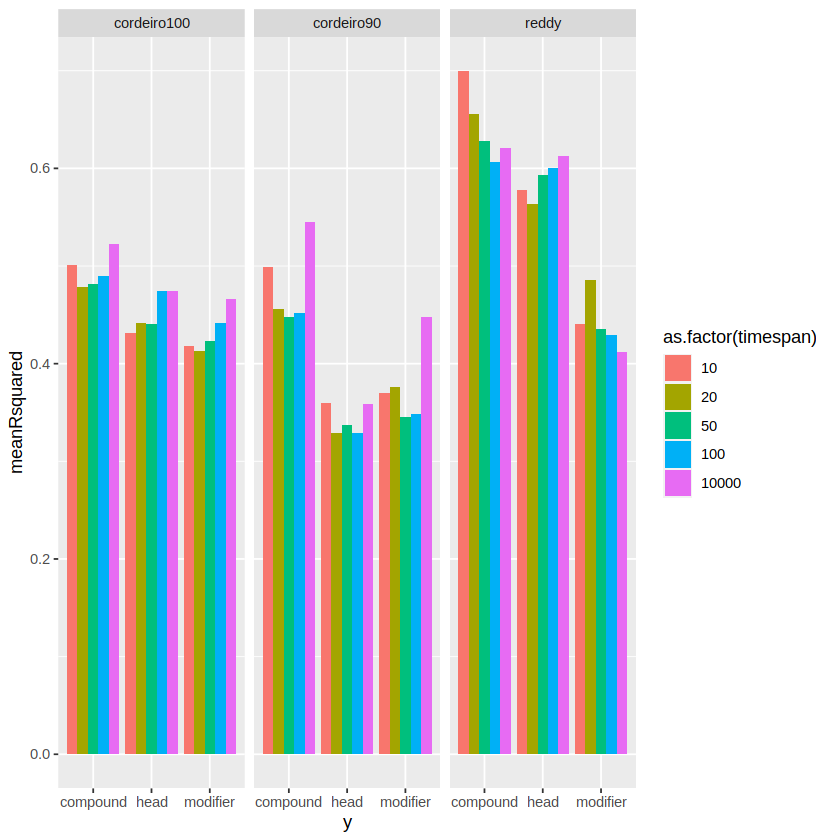

In [200]:
statistics %>% ggplot(aes(x=meanRsquared,y=y,fill=as.factor(timespan))) + facet_grid(~dataset) +geom_bar(stat='identity',position = "dodge")  + 
coord_flip()

In [201]:
statistics_varimp_pivoted_df %>% filter(tag=="UnTagged" & ppmi=="RAW" & setting=="Agnostic" & impute=="na" & dataset=="reddy") #& compound

corpus,tag,ppmi,setting,impute,dataset,y,pattern,timespan,cutoff,feature_time,feature,time,value,feature_class
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>
